# Step-1: Loading Data

In [1]:
import numpy as np #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
currentdir = os.getcwd() #Get current Working Directory
currentdir = currentdir[:len(currentdir)-11] # Replacing The Current directory
currentdir += "Datasets/archive/" #Directory Of Dataset Used
file1 = currentdir + "A_test_data.csv" #File name
df1 = pd.read_csv(file1) #Reading The File
df1.head() #Displaying the file

,id,account,IP,url,port,vlan,switchIP,time
0,1,xiaojiawei@qq.com,192.168.2.130,http://service.foxmail.com,26616,700,168.8.42.39,2021/6/5 8:31
1,2,xiaojiawei@qq.com,192.168.12.132,http://101.199.128.175,17175,700,127.51.2.53,2021/6/15 6:05
2,3,xiaojiawei@qq.com,192.168.10.5,http://news.sohu.com,33385,700,130.2.2.12,2021/5/10 6:42
3,4,xiaojiawei@qq.com,192.168.8.27,http://www.hostbuf.com,11188,700,121.9.3.251,2021/5/18 7:50
4,5,xiaojiawei@qq.com,192.168.16.243,http://p2.so.qhimgs1.com,15788,700,168.8.42.39,2021/6/17 8:09


In [3]:
file2 = currentdir + "train_data.csv" #File name
df2 = pd.read_csv(file2) #Reading The File
df2.head() #Displaying the file

,id,account,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,2021/6/16 7:56,0.1149
1,2,xiaojiawei@qq.com,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,2021/6/28 7:58,0.1801
2,3,xiaojiawei@qq.com,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,2021/6/1 6:37,0.3690
3,4,xiaojiawei@qq.com,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,2021/5/5 8:18,0.1532
4,5,xiaojiawei@qq.com,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,2021/6/20 6:52,0.1449


# Step-2: Gathering Info about data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211403 entries, 0 to 211402
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        211403 non-null  int64 
 1   account   211403 non-null  object
 2   IP        211403 non-null  object
 3   url       211403 non-null  object
 4   port      211403 non-null  int64 
 5   vlan      211403 non-null  int64 
 6   switchIP  211403 non-null  object
 7   time      211403 non-null  object
dtypes: int64(3), object(5)
memory usage: 12.9+ MB


In [5]:
df1.describe()

,id,port,vlan
count,211403.000000,211403.000000,211403.000000
mean,105702.000000,25217.220096,1152.530002
std,61026.933816,8541.393071,438.956840
min,1.000000,11122.000000,700.000000
25%,52851.500000,16863.000000,900.000000
50%,105702.000000,25218.000000,1000.000000
75%,158552.500000,33455.000000,1200.000000
max,211403.000000,38867.000000,2000.000000


In [6]:
df1.isnull().sum()

id          0
account     0
IP          0
url         0
port        0
vlan        0
switchIP    0
time        0
dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528690 entries, 0 to 528689
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        528690 non-null  int64  
 1   account   528690 non-null  object 
 2   IP        528690 non-null  object 
 3   url       528690 non-null  object 
 4   port      528690 non-null  int64  
 5   vlan      528690 non-null  int64  
 6   switchIP  528690 non-null  object 
 7   time      528690 non-null  object 
 8   ret       528690 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 36.3+ MB


In [8]:
df2.describe()

,id,port,vlan,ret
count,528690.000000,528690.000000,528690.000000,528690.000000
mean,264345.500000,25241.669929,1152.486902,0.257757
std,152619.801246,8543.017235,438.932786,0.219326
min,1.000000,11122.000000,700.000000,0.000100
25%,132173.250000,16865.000000,900.000000,0.078500
50%,264345.500000,25278.000000,1000.000000,0.208000
75%,396517.750000,33474.000000,1200.000000,0.377400
max,528690.000000,38867.000000,2000.000000,1.000000


In [9]:
df2.isnull().sum()

id          0
account     0
IP          0
url         0
port        0
vlan        0
switchIP    0
time        0
ret         0
dtype: int64

# Step-3: Preprocessing

In [10]:
from datetime import datetime #Converting Object in time column into a Unix Time stamp
def conv_to_timestamp(date_string):
    date_object= datetime.strptime(date_string, "%Y/%m/%d %H:%M")
    return int(date_object.timestamp())

df1['time'] = df1['time'].apply(conv_to_timestamp)
df2['time'] = df2['time'].apply(conv_to_timestamp)

In [11]:
df1.head()

,id,account,IP,url,port,vlan,switchIP,time
0,1,xiaojiawei@qq.com,192.168.2.130,http://service.foxmail.com,26616,700,168.8.42.39,1622862060
1,2,xiaojiawei@qq.com,192.168.12.132,http://101.199.128.175,17175,700,127.51.2.53,1623717300
2,3,xiaojiawei@qq.com,192.168.10.5,http://news.sohu.com,33385,700,130.2.2.12,1620609120
3,4,xiaojiawei@qq.com,192.168.8.27,http://www.hostbuf.com,11188,700,121.9.3.251,1621304400
4,5,xiaojiawei@qq.com,192.168.16.243,http://p2.so.qhimgs1.com,15788,700,168.8.42.39,1623897540


In [12]:
df2.head()

,id,account,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,1623810360,0.1149
1,2,xiaojiawei@qq.com,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,1624847280,0.1801
2,3,xiaojiawei@qq.com,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,1622509620,0.3690
3,4,xiaojiawei@qq.com,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,1620182880,0.1532
4,5,xiaojiawei@qq.com,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,1624152120,0.1449


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

df1['IP'] = le.fit_transform(df1['IP']) #Applying Label Encoder on account
df2['IP'] = le.fit_transform(df2['IP'])

df1['account'] = le.fit_transform(df1['account']) #Applying Label Encoder on account
df2['account'] = le.fit_transform(df2['account'])

df1['url'] = le.fit_transform(df1['url']) #Applying Label Encoder on url
df2['url'] = le.fit_transform(df2['url']) 


In [14]:
"""df1.head() """

'df1.head() '

In [15]:
"""df2.head()"""

'df2.head()'

In [16]:
"""ohe = OneHotEncoder(sparse_output = False)
# Combine unique URLs from both datasets
all_urls = pd.concat([df1['url'], df2['url']]).unique()
ohe.fit(all_urls.reshape(-1, 1))

# Transform each dataset
url_encoded_1 = ohe.transform(df1[['url']])
url_encoded_2 = ohe.transform(df2[['url']])

# Create DataFrames with correct feature names
feature_names = ohe.get_feature_names_out(['url'])
url_encoded_df_1 = pd.DataFrame(url_encoded_1, columns=feature_names)
url_encoded_df_2 = pd.DataFrame(url_encoded_2, columns=feature_names)

# Concatenate with original dataframes
df_encoded_1 = pd.concat([df1.drop('url', axis=1), url_encoded_df_1], axis=1)
df_encoded_2 = pd.concat([df2.drop('url', axis=1), url_encoded_df_2], axis=1)"""

"ohe = OneHotEncoder(sparse_output = False)\n# Combine unique URLs from both datasets\nall_urls = pd.concat([df1['url'], df2['url']]).unique()\nohe.fit(all_urls.reshape(-1, 1))\n\n# Transform each dataset\nurl_encoded_1 = ohe.transform(df1[['url']])\nurl_encoded_2 = ohe.transform(df2[['url']])\n\n# Create DataFrames with correct feature names\nfeature_names = ohe.get_feature_names_out(['url'])\nurl_encoded_df_1 = pd.DataFrame(url_encoded_1, columns=feature_names)\nurl_encoded_df_2 = pd.DataFrame(url_encoded_2, columns=feature_names)\n\n# Concatenate with original dataframes\ndf_encoded_1 = pd.concat([df1.drop('url', axis=1), url_encoded_df_1], axis=1)\ndf_encoded_2 = pd.concat([df2.drop('url', axis=1), url_encoded_df_2], axis=1)"

In [17]:
"""df_encoded_1.head()"""

'df_encoded_1.head()'

# Step-4 Applying Techniques

In [31]:
from sklearn.ensemble import IsolationForest #Using Isolation Forest
isf = IsolationForest(contamination='auto', random_state=120)

features_train = ['account','port','IP','vlan','url'] #Selecting training features
X_train = df2[features_train]

features_test = ['account','port','IP','vlan','url']
X_test = df1[features_test]

isf.fit(X_train) #Fitting the model with training data
predictions = isf.predict(X_test)
anomaly_scores = isf.decision_function(X_test)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1

In [32]:
predictions

array([0, 1, 0, ..., 1, 1, 1])

In [33]:
anomaly_scores

array([ 0.00206535, -0.03355896,  0.00014928, ..., -0.03031238,
       -0.04813483, -0.06300952])

# Step-5: Visualization

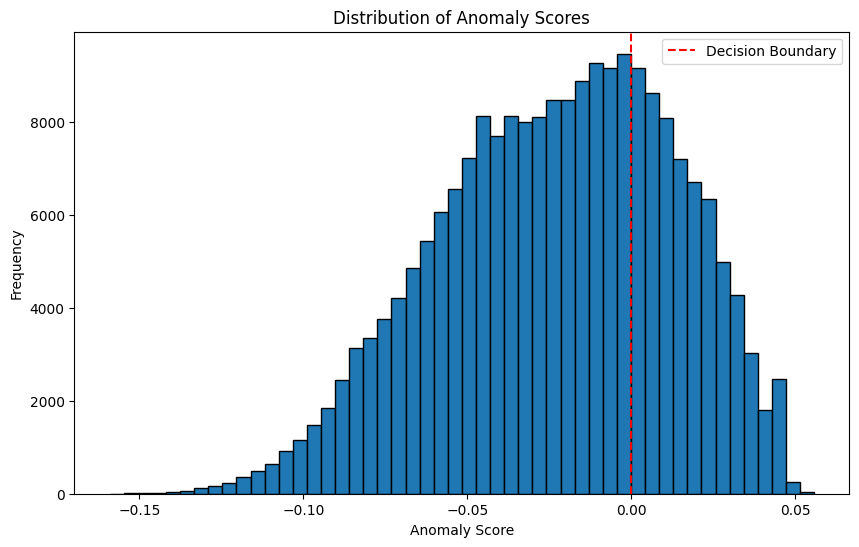

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='k')
plt.axvline(0, color='r', linestyle='--', label='Decision Boundary')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()


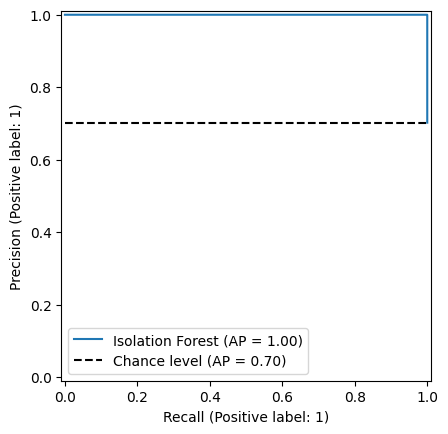

In [35]:
from sklearn.metrics import PrecisionRecallDisplay
y_true = predictions
y_score = -anomaly_scores
display = PrecisionRecallDisplay.from_predictions(y_true,y_score,name="Isolation Forest", plot_chance_level=True)